# Creating maps of street designations for Switzerland

## Load libraries and data

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

%matplotlib inline

<font color='red'>WARNING</font> streets_geom (pure_line.geojson) file is 450 MByte and takes a couple of min to load

In [2]:
# Street name designations
streetnames = pd.read_csv('../Datapreparation/streetnames.csv', encoding='UTF-8-SIG', sep=';')

# Street name geometries
streets_geom = geopandas.read_file('data/pure_line.geojson')

## Merging datasets

In [3]:
# Create dataset with all information on street level
streetnames_geom = pd.merge(streets_geom, streetnames, on=['STR_ESID'])

## Map of street designations

In [4]:
streetnames_geom.columns
# interesting for mapping: LENGTH: length of streets with streetnames / STR_TERMS: street designation / 
# STR_PREPS: street proposition


Index(['OBJECTID_1', 'STR_ESID', 'STN_LANG', 'Shape_Length', 'LENGTH',
       'geometry', 'Unnamed: 0', 'STN_LABEL', 'COM_FOSNR', 'COM_NAME',
       'COM_CANTON', 'STR_OFFICIAL', 'STR_EASTING', 'STR_NORTHING',
       'STN_LABEL_NO_BI', 'STN_LABEL_NO_TERMS', 'STR_TERMS', 'STR_PREPS',
       'STN_LABEL_FINAL'],
      dtype='object')

<AxesSubplot: >

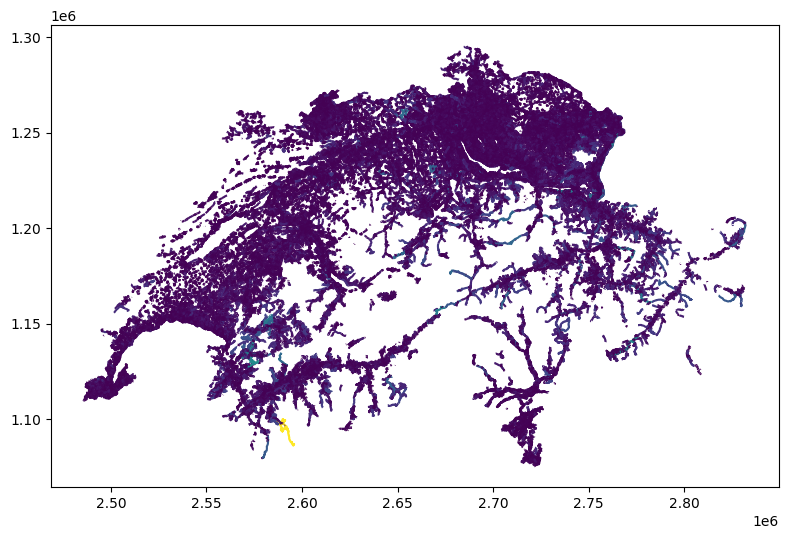

In [5]:
streets_geom.plot(column='LENGTH', figsize=(10, 6))

## Zoom into 

Zürich

#Easily find coordinates on https://map.geo.admin.ch/mobile.html?lang=de&topic=ech&bgLayer=ch.swisstopo.swissimage&layers=ch.swisstopo.zeitreihen,ch.bfs.gebaeude_wohnungs_register,ch.bav.haltestellen-oev,ch.swisstopo.swisstlm3d-wanderwege,ch.astra.wanderland-sperrungen_umleitungen,ch.swisstopo.amtliches-strassenverzeichnis&layers_opacity=1,1,1,0.8,0.8,0.85&layers_visibility=false,false,false,false,false,true&layers_timestamp=18641231,,,,,&E=2683751.46&N=1248252.00&zoom=5.118447144074026


In [6]:
#bounds for Zurich
xmin =2680728
xmax =2685960
ymin =1245584
ymax =1249858

In [7]:
#only keep street inside bounds
streets_geo_zurich = streetnames_geom.cx[xmin:xmax, ymin:ymax]

In [8]:
streets_geo_zurich.STR_TERMS.unique()

array(['strasse', nan, 'weg', 'gasse', 'quai', 'platz', 'piazza'],
      dtype=object)

Define colors. https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3 might help.

In [9]:
colors = {
    'strasse': '#a6cee3',
    'weg': '#b2df8a',
    'gasse': '#e6ab02',
    'quai': '#386cb0',
    'platz': '#f0027f',
    'piazza': '#e41a1c',
    'other': '#999999'
}

In [10]:
#Replace nan with other
streets_geo_zurich['STR_TERMS'] = streets_geo_zurich['STR_TERMS'].fillna('other')

C:\CAS_Arbeit\cassda-zertifikatsarbeit\venv\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Source for plot from https://github.com/theptyza/map_street_designations

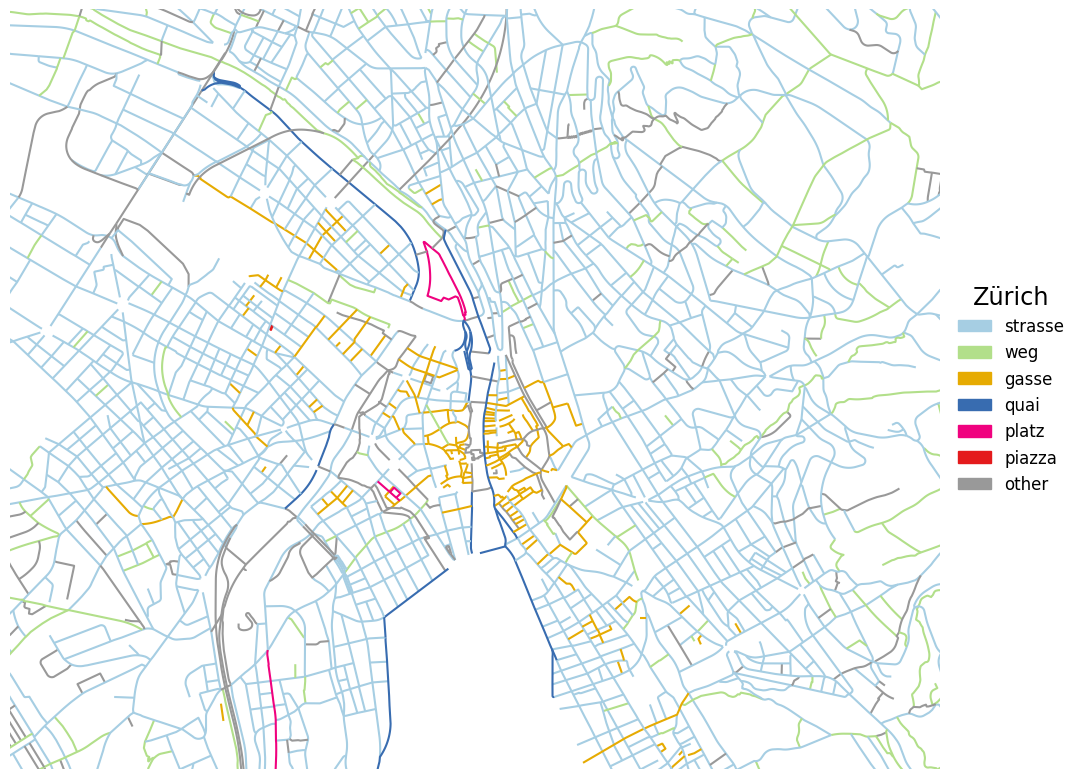

In [11]:
f, ax = plt.subplots(1, figsize=(12,12))
    
    
streets_geo_zurich.plot(ax=ax, 
                        color=[colors[d] for d in streets_geo_zurich.STR_TERMS])

ax.set_ylim((ymin, ymax))
ax.set_xlim((xmin, xmax))
plt.axis('off')

plt.legend(handles=[mpatches.Patch(color=colors[k],
                    label=k) for k in colors],
               loc='center right',
               fontsize='large',
               edgecolor='none',
               title='Zürich',
               title_fontsize='xx-large',
               bbox_to_anchor=(1.15, 0.5))

Genève

In [12]:
#bounds for Geneva
xmin =2497496
xmax =2503150
ymin =1116328
ymax =1119510

In [13]:
#only keep street inside bounds
streets_geo_geneva = streetnames_geom.cx[xmin:xmax, ymin:ymax]

In [14]:
streets_geo_geneva.STR_TERMS.unique()

array([nan, 'chemin', 'avenue', 'route', 'rue', 'quai', 'passage',
       'boulevard', 'ruelle', 'promenade', 'sentier', 'gasse', 'place'],
      dtype=object)

In [15]:
colors = {
    'chemin': '#cab2d6',
    'avenue': '#ffed6f',
    'route': '#fb9a99',
    'rue': '#d9d9d9',
    'quai': '#1f78b4',
    'passage': '#e41a1c',
    'boulevard': '#6a3d9a',
    'ruelle': '#d9d9d9',
    'promenade': '#ff7f00',
    'sentier': '#33a02c',
    'gasse': '#999999',
    'place': '#4cb580',
    'other': '#999999'
}

In [16]:
#Replace nan with other
streets_geo_geneva['STR_TERMS'] = streets_geo_geneva['STR_TERMS'].fillna('other')

C:\CAS_Arbeit\cassda-zertifikatsarbeit\venv\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


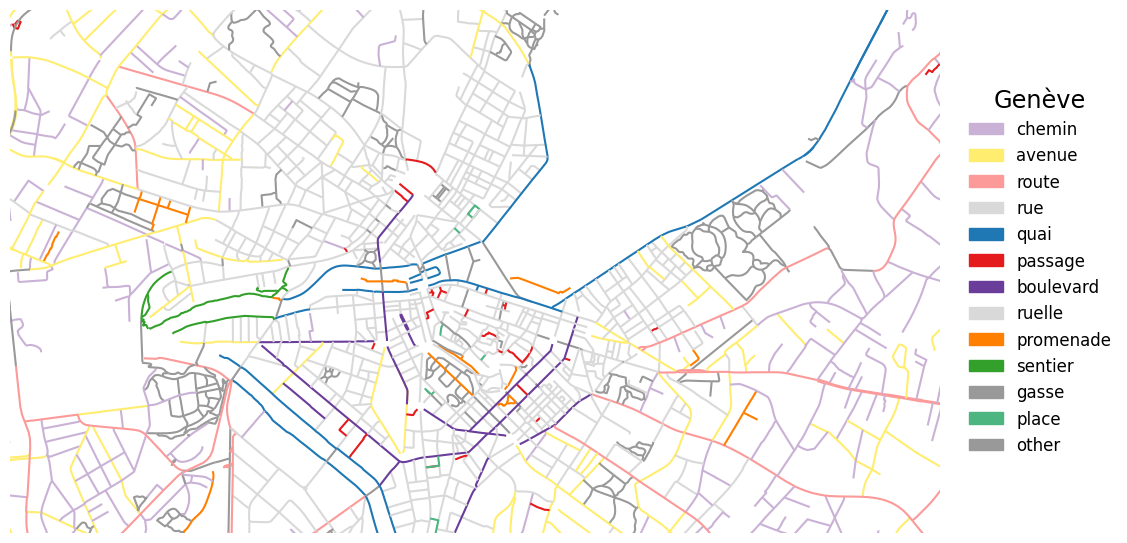

In [17]:
f, ax = plt.subplots(1, figsize=(12,12))
    
    
streets_geo_geneva.plot(ax=ax, 
                        color=[colors[d] for d in streets_geo_geneva.STR_TERMS])

ax.set_ylim((ymin, ymax))
ax.set_xlim((xmin, xmax))
plt.axis('off')

plt.legend(handles=[mpatches.Patch(color=colors[k],
                    label=k) for k in colors],
               loc='center right',
               fontsize='large',
               edgecolor='none',
               title='Genève',
               title_fontsize='xx-large',
               bbox_to_anchor=(1.2, 0.5))